In [1]:
import pandas as pd
import numpy as nd
from matplotlib import pyplot as plt

In [2]:
dim_match_summary = pd.read_csv("dim_match_summary.csv")
dim_players = pd.read_csv("dim_players.csv")
fact_bating_summary = pd.read_csv("fact_bating_summary.csv")
fact_bowling_summary = pd.read_csv("fact_bowling_summary.csv")

In [3]:
dim_match_summary.head(5)

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [4]:
dim_players.head(5)

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [5]:
fact_bowling_summary.head(5)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [6]:
fact_bating_summary.head(5)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [7]:
## Batting Performance Analysis

In [62]:
# Top 10 batsmen based on past 3 years total runs scored.

top_10_batsmen_total_scored = fact_bating_summary.groupby("batsmanName")['runs'].sum().nlargest(10)
top_10_batsmen_total_scored

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

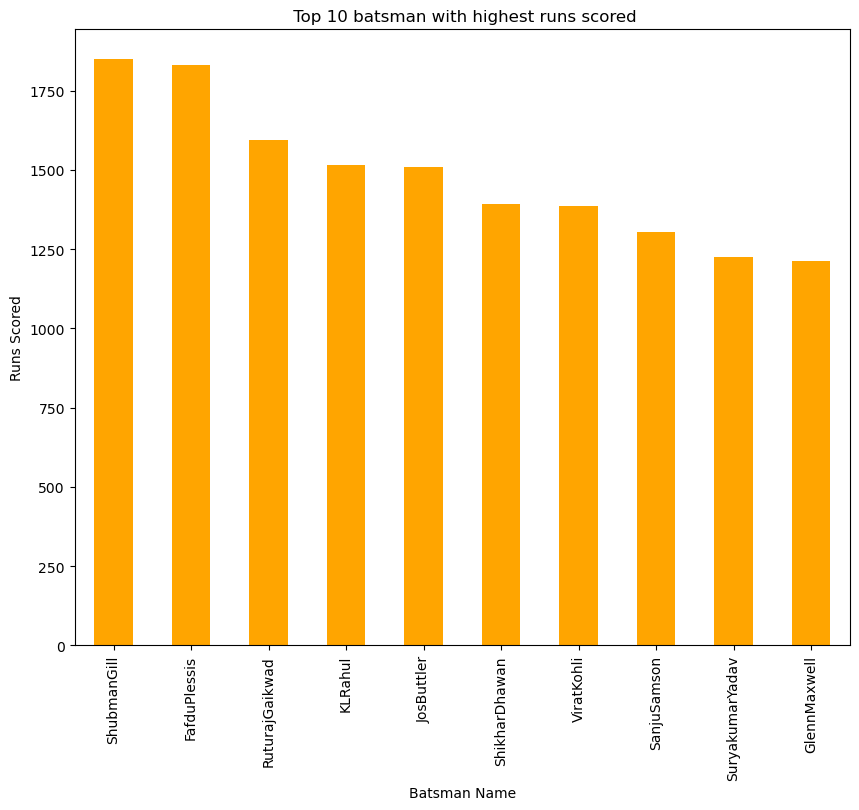

In [64]:
top_10_batsmen_total_scored.plot(kind = 'bar', color = 'orange', title = ' Top 10 batsman with highest runs scored', figsize = (10,8))
plt.xlabel('Batsman Name')
plt.ylabel('Runs Scored')
plt.show()

In [10]:
dim_match_summary['season']=dim_match_summary['matchDate'].str[-2:]
dim_match_summary

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,21
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,21
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,21
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819,21
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942,21
...,...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485,23
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117,23
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512,23
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853,23


In [11]:
df = fact_bating_summary.merge(dim_match_summary, on = "match_id", how = 'inner')
df.head(5)

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21


In [12]:
# Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

def count_the_out(list_of_outs):
    count = 0
    for i in list_of_outs:
        if i == 'out':
            count = count + 1
    return count
            
df_21 = df[df['season'] == '21'].groupby('batsmanName').agg({'runs':'sum','balls':'sum','out/not_out':count_the_out,'4s':'sum','6s':'sum'})
df_22 = df[df['season'] == '22'].groupby('batsmanName').agg({'runs':'sum','balls':'sum','out/not_out':count_the_out,'4s':'sum','6s':'sum'})
df_23 = df[df['season'] == '23'].groupby('batsmanName').agg({'runs':'sum','balls':'sum','out/not_out':count_the_out,'4s':'sum','6s':'sum'})
df_all_season = df_21.merge(df_22, on = 'batsmanName', how = 'inner').merge(df_23, on = 'batsmanName', how = 'inner')
df_all_season_lessthan_60 = df_all_season.drop(df_all_season[(df_all_season['balls_x']<60) | (df_all_season['balls_y']<60) | (df_all_season['balls']<60)].index)
df_all_season_lessthan_60['batting_average'] = (
    (df_all_season_lessthan_60['runs_x'] + df_all_season_lessthan_60['runs'] + df_all_season_lessthan_60['runs_y']) /
    (df_all_season_lessthan_60['out/not_out_x'] + df_all_season_lessthan_60['out/not_out_y'] + df_all_season_lessthan_60['out/not_out'])
)
df_all_season_lessthan_60['batting_average'].round(2).nlargest(10)

batsmanName
KLRahul            50.53
FafduPlessis       43.60
DavidMiller        43.20
JosButtler         41.92
ShimronHetmyer     40.67
ShubmanGill        40.24
ShikharDhawan      39.77
RuturajGaikwad     37.93
DavidWarner        37.90
SuryakumarYadav    35.00
Name: batting_average, dtype: float64

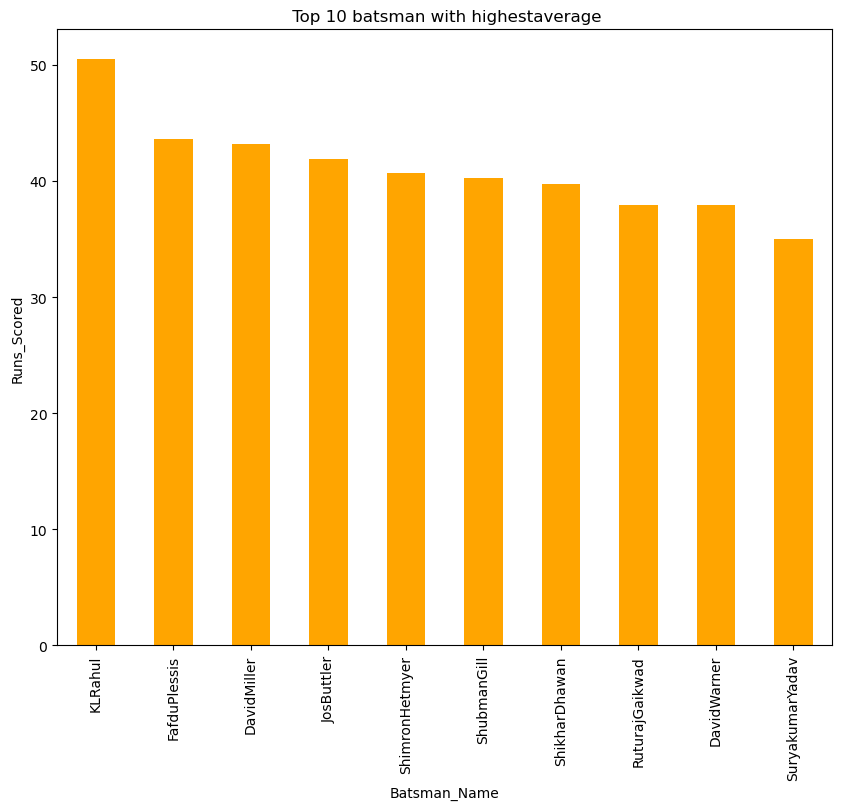

In [13]:
df_all_season_lessthan_60['batting_average'].round(2).nlargest(10).plot(kind = 'bar', color = 'orange', title = ' Top 10 batsman with highestaverage', figsize = (10,8))
plt.xlabel('Batsman_Name')
plt.ylabel('Runs_Scored')
plt.show()

In [14]:
# Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

df_all_season_lessthan_60['batting_strike_rate'] =  (
    (df_all_season_lessthan_60['runs_x'] + df_all_season_lessthan_60['runs'] + df_all_season_lessthan_60['runs_y']) /
    (df_all_season_lessthan_60['balls_x'] + df_all_season_lessthan_60['balls_y'] + df_all_season_lessthan_60['balls'])
)*100
df_all_season_lessthan_60['batting_strike_rate'].round(1).nlargest(10)

batsmanName
GlennMaxwell       161.4
SuryakumarYadav    160.6
AndreRussell       159.2
ShimronHetmyer     157.3
NicholasPooran     157.1
PrithviShaw        153.2
DineshKarthik      152.6
YashasviJaiswal    152.2
JosButtler         146.9
ShivamDube         146.0
Name: batting_strike_rate, dtype: float64

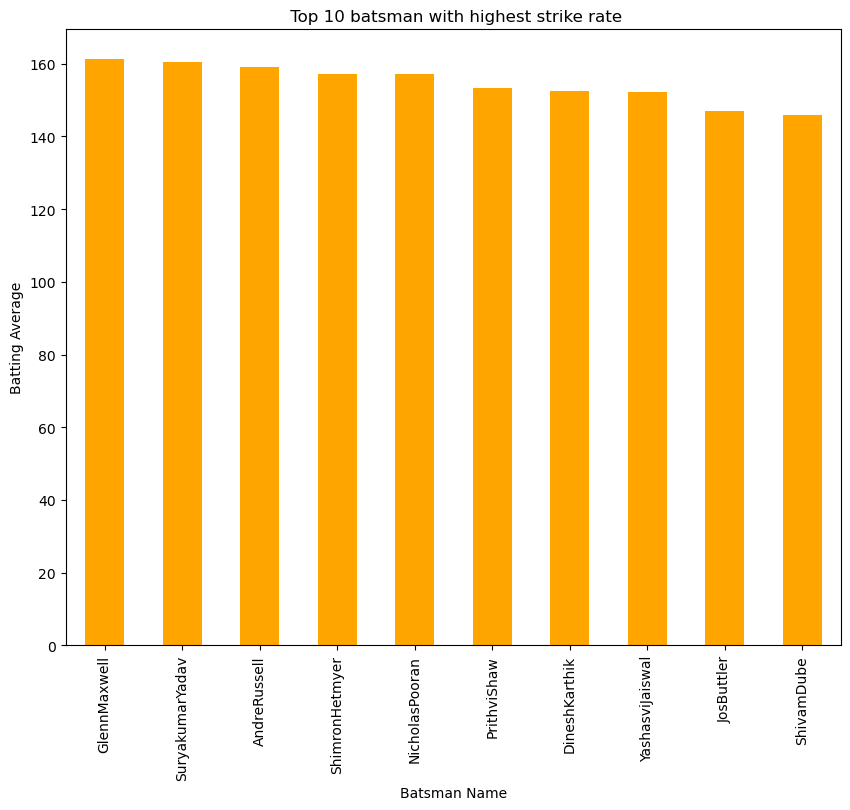

In [15]:
df_all_season_lessthan_60['batting_strike_rate'].round(1).nlargest(10).plot(kind = 'bar', color = 'orange', title = ' Top 10 batsman with highest strike rate', figsize = (10,8))
plt.xlabel('Batsman Name')
plt.ylabel('Batting Average')
plt.show()

In [16]:
# Top 5 batsmen based on past 3 years boundary % (fours and sixes)

df_all_season_lessthan_60['boundary_percentage'] = (
                                                     (((df_all_season_lessthan_60['4s_x'] + df_all_season_lessthan_60['4s_y'] +
                                                     df_all_season_lessthan_60['4s'])*4) + ((df_all_season_lessthan_60['6s_x'] + df_all_season_lessthan_60['6s_y'] +
                                                     df_all_season_lessthan_60['6s'])*6)) / (df_all_season_lessthan_60['runs_x'] + 
                                                     df_all_season_lessthan_60['runs'] + df_all_season_lessthan_60['runs_y'])
                                                   )*100
df_all_season_lessthan_60['boundary_percentage'].round(2).nlargest(5)

batsmanName
AndreRussell       75.70
YashasviJaiswal    74.56
PrithviShaw        70.67
JosButtler         68.92
GlennMaxwell       68.70
Name: boundary_percentage, dtype: float64

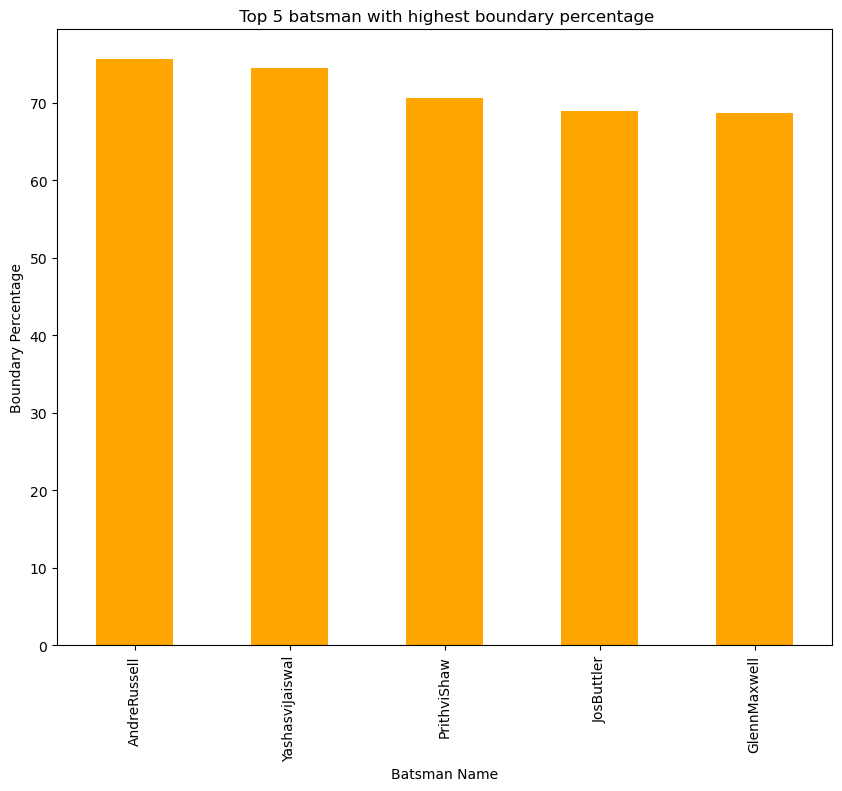

In [17]:
df_all_season_lessthan_60['boundary_percentage'].round(2).nlargest(5).plot(kind = 'bar', color = 'orange', title = ' Top 5 batsman with highest boundary percentage', figsize = (10,8))
plt.xlabel('Batsman Name')
plt.ylabel('Boundary Percentage')
plt.show()

In [18]:
# Bowling Performance Analysis

In [19]:
fact_bowling_summary.head(5)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [20]:
# Top 10 bowlers based on past 3 years total wickets taken

fact_bowling_summary.groupby("bowlerName")['wickets'].sum().nlargest(10)

bowlerName
MohammedShami        67
YuzvendraChahal      66
HarshalPatel         65
RashidKhan           63
AveshKhan            47
ArshdeepSingh        45
KagisoRabada         45
VarunChakravarthy    44
ShardulThakur        43
TrentBoult           42
Name: wickets, dtype: int64

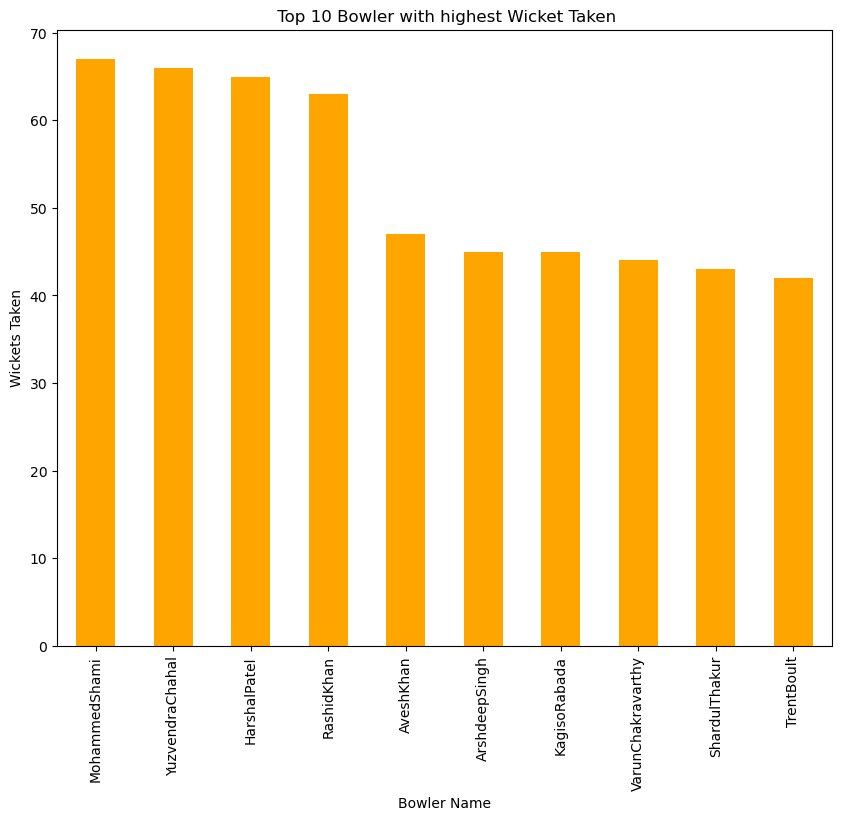

In [21]:
fact_bowling_summary.groupby("bowlerName")['wickets'].sum().nlargest(10).plot(kind = 'bar', color = 'orange', title = ' Top 10 Bowler with highest Wicket Taken', figsize = (10,8))
plt.xlabel('Bowler Name')
plt.ylabel('Wickets Taken')
plt.show()

In [22]:
df_bowl = fact_bowling_summary.merge(dim_match_summary, on = "match_id", how = 'inner')
df_bowl.head(5)

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,team1,team2,winner,margin,matchDate,season
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",21


In [23]:
# Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

df_21_bowl = df_bowl[df_bowl['season'] == '21'].groupby('bowlerName').agg({'runs':'sum','wickets':'sum','overs':'sum','0s':'sum'})
df_22_bowl = df_bowl[df_bowl['season'] == '22'].groupby('bowlerName').agg({'runs':'sum','wickets':'sum','overs':'sum','0s':'sum'})
df_23_bowl = df_bowl[df_bowl['season'] == '23'].groupby('bowlerName').agg({'runs':'sum','wickets':'sum','overs':'sum','0s':'sum'})
df_all_season_bowl = df_21_bowl.merge(df_22_bowl, on = 'bowlerName', how = 'inner').merge(df_23_bowl, on = 'bowlerName', how = 'inner')
df_all_season_lessthan_60_bowl = df_all_season_bowl.drop(df_all_season_bowl[(df_all_season_bowl['overs_x']*6<60) | (df_all_season_bowl['overs_y']*6<60)
                                 | (df_all_season_bowl['overs']*6<60)].index)
df_all_season_lessthan_60_bowl['bowling_average'] = (
    (df_all_season_lessthan_60_bowl['runs_x'] + df_all_season_lessthan_60_bowl['runs'] + df_all_season_lessthan_60_bowl['runs_y']) /
    (df_all_season_lessthan_60_bowl['wickets_x'] + df_all_season_lessthan_60_bowl['wickets_y'] + df_all_season_lessthan_60_bowl['wickets'])
)
df_all_season_lessthan_60_bowl['bowling_average'].round(1).nsmallest(10)

bowlerName
AndreRussell       18.2
YuzvendraChahal    20.2
HarshalPatel       20.4
RashidKhan         20.9
MohammedShami      21.0
AveshKhan          23.7
KagisoRabada       23.8
MoeenAli           23.9
AnrichNortje       24.8
UmranMalik         26.1
Name: bowling_average, dtype: float64

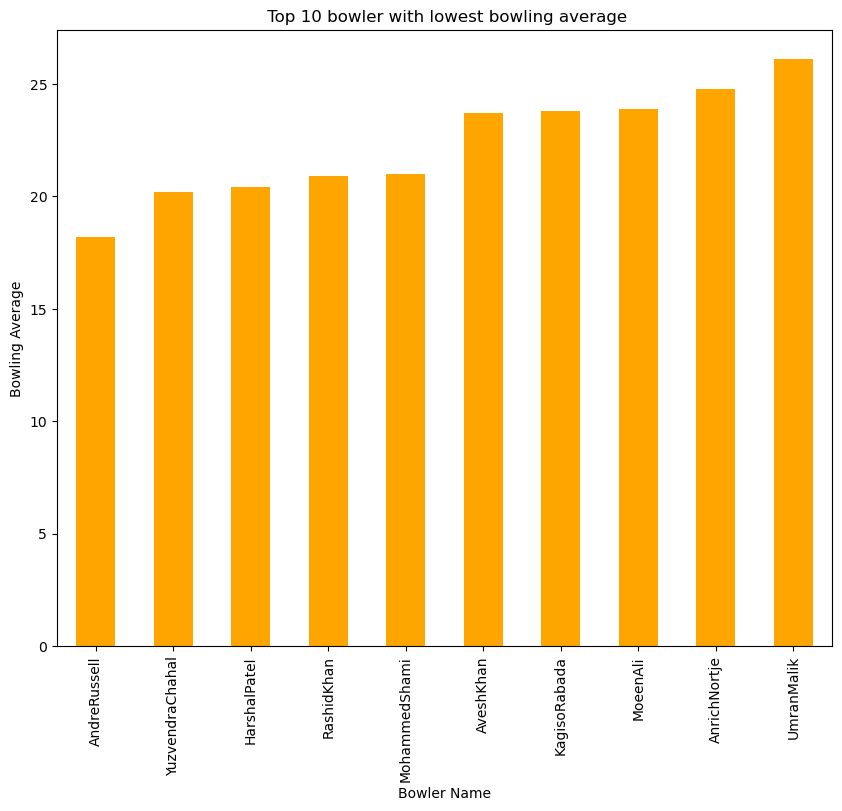

In [24]:
df_all_season_lessthan_60_bowl['bowling_average'].round(1).nsmallest(10).plot(kind = 'bar', color = 'orange', title = ' Top 10 bowler with lowest bowling average', figsize = (10,8))
plt.xlabel('Bowler Name')
plt.ylabel('Bowling Average')
plt.show()

In [25]:
# Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)

df_all_season_lessthan_60_bowl['economy_rate'] = (
    (df_all_season_lessthan_60_bowl['runs_x'] + df_all_season_lessthan_60_bowl['runs'] + df_all_season_lessthan_60_bowl['runs_y']) /
    (df_all_season_lessthan_60_bowl['overs_x'] + df_all_season_lessthan_60_bowl['overs_y'] + df_all_season_lessthan_60_bowl['overs'])
)
df_all_season_lessthan_60_bowl['economy_rate'].round(2).nsmallest(10)

bowlerName
SunilNarine           6.60
MoeenAli              7.09
AxarPatel             7.11
RashidKhan            7.22
KrunalPandya          7.45
RavindraJadeja        7.46
RavichandranAshwin    7.53
VarunChakravarthy     7.58
HarpreetBrar          7.61
RahulChahar           7.68
Name: economy_rate, dtype: float64

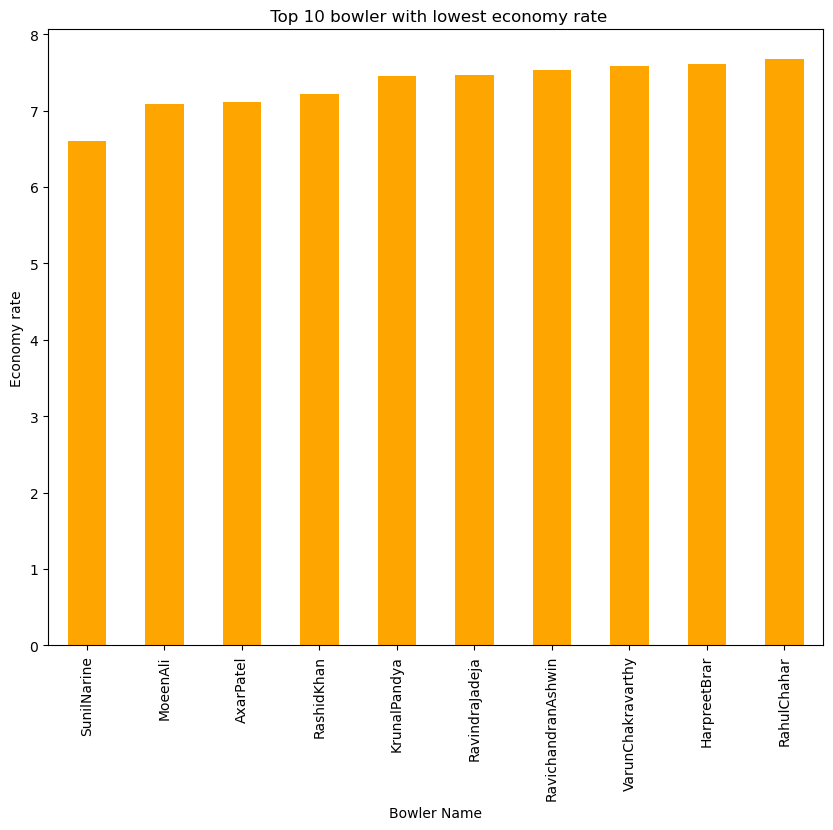

In [26]:
df_all_season_lessthan_60_bowl['economy_rate'].round(2).nsmallest(10).plot(kind = 'bar', color = 'orange', title = ' Top 10 bowler with lowest economy rate', figsize = (10,8))
plt.xlabel('Bowler Name')
plt.ylabel('Economy rate')
plt.show()

In [27]:
# Top 5 bowlers based on past 3 years dot ball %.

df_all_season_lessthan_60_bowl['dot_ball_%'] = (
    (df_all_season_lessthan_60_bowl['0s_x'] + df_all_season_lessthan_60_bowl['0s_y'] + df_all_season_lessthan_60_bowl['0s']) /
    ((
        df_all_season_lessthan_60_bowl['overs_x'].astype(int)//1 + df_all_season_lessthan_60_bowl['overs_x'].astype(float) % 1 +
        df_all_season_lessthan_60_bowl['overs_y'].astype(int)//1 + df_all_season_lessthan_60_bowl['overs_y'].astype(float) % 1 +
        df_all_season_lessthan_60_bowl['overs'].astype(int)//1 + df_all_season_lessthan_60_bowl['overs'].astype(float) % 1
    ) * 6 ) # Multiply by 6 to convert overs to balls
)*100

df_all_season_lessthan_60_bowl['dot_ball_%'].round(2).nlargest(7)

bowlerName
MohammedSiraj       47.71
MohammedShami       47.65
TrentBoult          46.53
UmranMalik          44.18
KhaleelAhmed        43.64
KagisoRabada        43.41
BhuvneshwarKumar    42.50
Name: dot_ball_%, dtype: float64

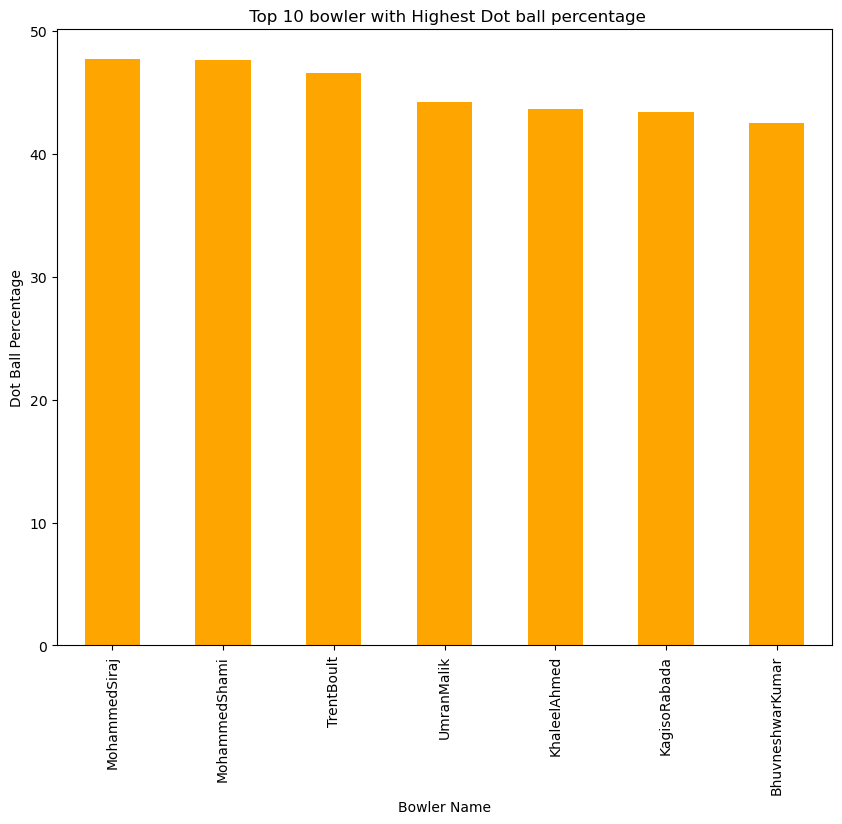

In [28]:
df_all_season_lessthan_60_bowl['dot_ball_%'].round(2).nlargest(7).plot(kind = 'bar', color = 'orange', title = ' Top 10 bowler with Highest Dot ball percentage', figsize = (10,8))
plt.xlabel('Bowler Name')
plt.ylabel('Dot Ball Percentage')
plt.show()

In [29]:
# Top Maiden Overs

df_21_bowl = df_bowl[df_bowl['season'] == '21'].groupby('bowlerName').agg({'runs':'sum','wickets':'sum','overs':'sum','0s':'sum','maiden':'sum'})
df_22_bowl = df_bowl[df_bowl['season'] == '22'].groupby('bowlerName').agg({'runs':'sum','wickets':'sum','overs':'sum','0s':'sum','maiden':'sum'})
df_23_bowl = df_bowl[df_bowl['season'] == '23'].groupby('bowlerName').agg({'runs':'sum','wickets':'sum','overs':'sum','0s':'sum','maiden':'sum'})
df_all_season_bowl = df_21_bowl.merge(df_22_bowl, on = 'bowlerName', how = 'inner').merge(df_23_bowl, on = 'bowlerName', how = 'inner')
df_all_season_lessthan_60_bowl_maiden = df_all_season_bowl.drop(df_all_season_bowl[(df_all_season_bowl['overs_x']*6<60) | (df_all_season_bowl['overs_y']*6<60)
                                 | (df_all_season_bowl['overs']*6<60)].index)
df_all_season_lessthan_60_bowl_maiden['Total_maiden'] = (df_all_season_lessthan_60_bowl_maiden['maiden_x'] + df_all_season_lessthan_60_bowl_maiden['maiden_y'] 
                                                 + df_all_season_lessthan_60_bowl_maiden['maiden'])
df_all_season_lessthan_60_bowl_maiden['Total_maiden'].round(2).nlargest(4)
# df_all_season_lessthan_60_bowl_maiden.head(5)

bowlerName
TrentBoult          7
BhuvneshwarKumar    4
MohammedShami       3
HarshalPatel        2
Name: Total_maiden, dtype: int64

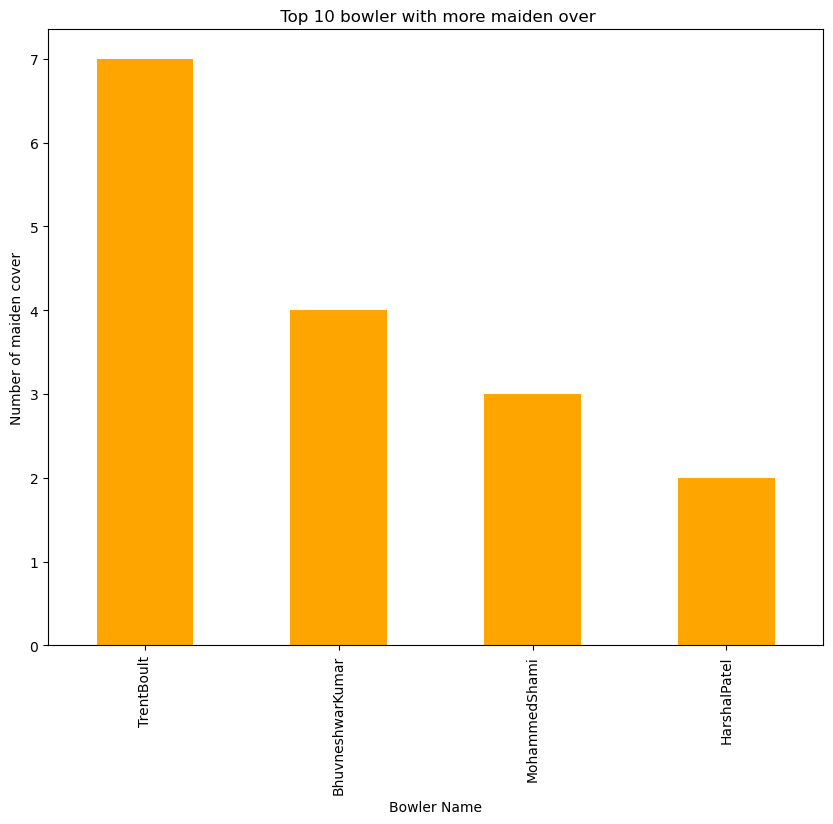

In [30]:
df_all_season_lessthan_60_bowl_maiden['Total_maiden'].round(2).nlargest(4).plot(kind = 'bar', color = 'orange', title = ' Top 10 bowler with more maiden over', figsize = (10,8))
plt.xlabel('Bowler Name')
plt.ylabel('Number of maiden cover')
plt.show()

In [31]:
# Team Performance Analysis

In [32]:
dim_match_summary.head(5)

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,21
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,21
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,21
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819,21
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942,21


In [33]:
# Season 2021 Wins of teams
dim_match_summary[dim_match_summary['season'] == '21'].groupby('winner')['winner'].count().sort_values(ascending = False)

winner
Super Kings     11
Capitals         9
KKR              9
RCB              9
Mumbai           7
Punjab Kings     6
Royals           5
Sunrisers        3
Name: winner, dtype: int64

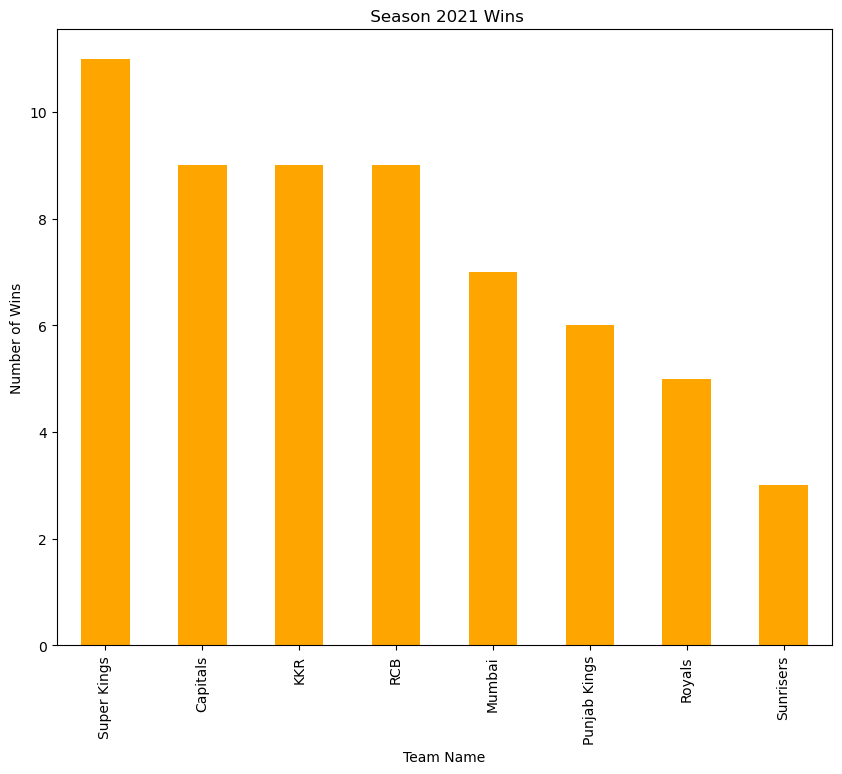

In [34]:
dim_match_summary[dim_match_summary['season'] == '21'].groupby('winner')['winner'].count().sort_values(ascending = False).plot(kind = 'bar', color = 'orange', title = ' Season 2021 Wins', figsize = (10,8))
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
plt.show()

In [35]:
# Season 2022 Wins of teams
dim_match_summary[dim_match_summary['season'] == '22'].groupby('winner')['winner'].count().sort_values(ascending = False)

winner
Titans          12
Royals          10
RCB              9
Super Giants     9
Capitals         7
Punjab Kings     7
KKR              6
Sunrisers        6
Mumbai           4
Super Kings      4
Name: winner, dtype: int64

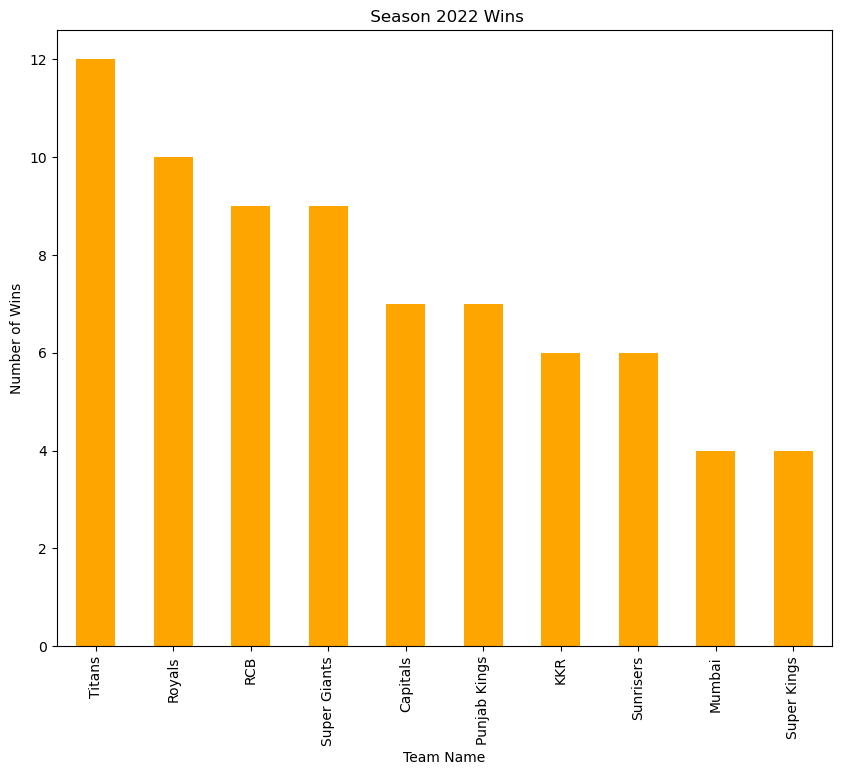

In [36]:
dim_match_summary[dim_match_summary['season'] == '22'].groupby('winner')['winner'].count().sort_values(ascending = False).plot(kind = 'bar', color = 'orange', title = ' Season 2022 Wins', figsize = (10,8))
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
plt.show()

In [37]:
# Season 2023 Wins of teams

dim_match_summary[dim_match_summary['season'] == '23'].groupby('winner')['winner'].count().sort_values(ascending = False)

winner
Titans          11
Super Kings     10
Mumbai           9
Super Giants     8
RCB              7
Royals           7
KKR              6
Punjab Kings     6
Capitals         5
Sunrisers        4
Name: winner, dtype: int64

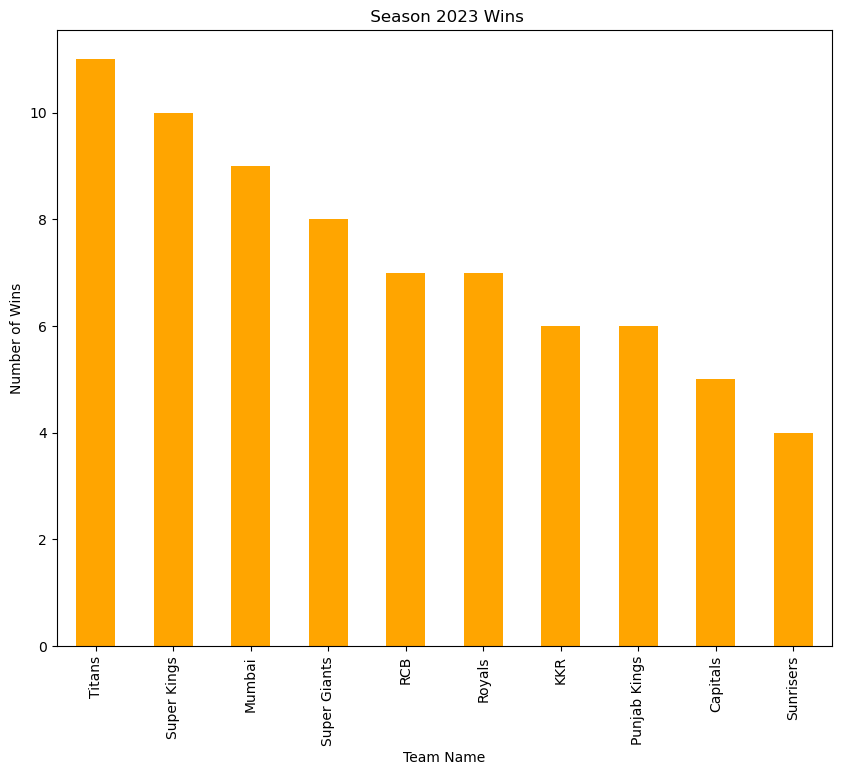

In [38]:
dim_match_summary[dim_match_summary['season'] == '23'].groupby('winner')['winner'].count().sort_values(ascending = False).plot(kind = 'bar', color = 'orange', title = ' Season 2023 Wins', figsize = (10,8))
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')
plt.show()

In [39]:
# Total boundaries scored by each team throughout the season

fact_bating_summary.groupby('teamInnings').agg({'4s':'sum', '6s':'sum'}).sort_values(['6s','4s'],ascending = False)

,4s,6s
teamInnings,,
Super Kings,611,351
Royals,650,339
KKR,599,336
Punjab Kings,582,320
Mumbai,619,316
RCB,614,288
Sunrisers,523,246
Capitals,631,236
Super Giants,365,226


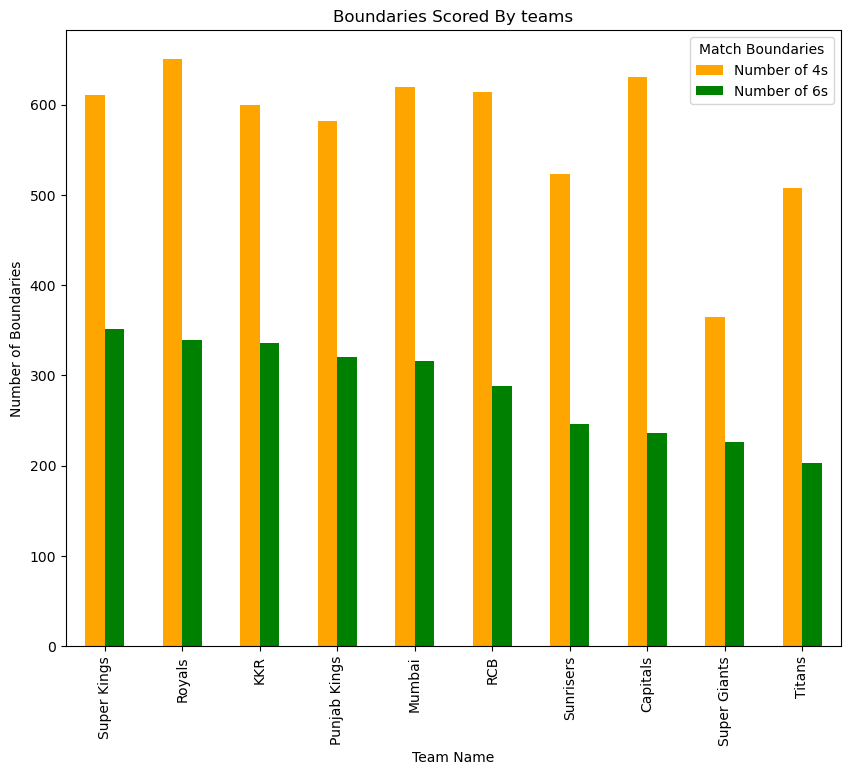

In [40]:
fact_bating_summary.groupby('teamInnings').agg({'4s':'sum', '6s':'sum'}).sort_values(['6s','4s'],ascending = False).plot(kind = 'bar', color = ['orange','green'], title = 'Boundaries Scored By teams', figsize = (10,8))
plt.xlabel('Team Name')
plt.legend(labels=['Number of 4s','Number of 6s'], title='Match Boundaries')
plt.ylabel('Number of Boundaries')
plt.show()

In [41]:
dim_match_summary.head(5)

,team1,team2,winner,margin,matchDate,match_id,season
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817,21
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442,21
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597,21
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819,21
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942,21


In [42]:
# Team Performance analysis on Home And Away Wins

Homewins = dim_match_summary[dim_match_summary['team1'] == dim_match_summary['winner']].groupby('team1')['team1'].count()
Homelose = dim_match_summary[dim_match_summary['team1'] != dim_match_summary['winner']].groupby('team1')['team1'].count()
Awaywins = dim_match_summary[dim_match_summary['team2'] == dim_match_summary['winner']].groupby('team2')['team2'].count()
Awaylose = dim_match_summary[dim_match_summary['team2'] != dim_match_summary['winner']].groupby('team2')['team2'].count()
Teams_wins_loss = pd.concat([Homewins, Homelose, Awaywins, Awaylose], axis=1, keys=['Homewins', 'Homelose', 'Awaywins', 'Awaylose'], join='outer')
Teams_wins_loss['TotalMatchces'] = Teams_wins_loss['Homewins'] + Teams_wins_loss['Homelose'] + Teams_wins_loss['Awaywins'] + Teams_wins_loss['Awaylose']
Teams_wins_loss['TotalWins'] = Teams_wins_loss['Homewins'] + Teams_wins_loss['Awaywins']
Teams_wins_loss['TotalLoss'] = Teams_wins_loss['Homelose'] + Teams_wins_loss['Awaylose']
Teams_wins_loss['Chasewins'] = dim_match_summary[dim_match_summary['margin'].str.contains("wickets")].groupby('winner')['team1'].count()
Teams_wins_loss.head(20)

,Homewins,Homelose,Awaywins,Awaylose,TotalMatchces,TotalWins,TotalLoss,Chasewins
Capitals,7,9,14,13,43,21,22,14
KKR,7,11,14,13,45,21,24,14
Mumbai,7,12,13,12,44,20,24,13
Punjab Kings,11,16,8,7,42,19,23,8
RCB,15,11,10,9,45,25,20,10
Royals,13,14,9,9,45,22,23,9
Sunrisers,4,11,9,17,41,13,28,9
Super Giants,12,2,5,10,29,17,12,4
Super Kings,14,15,11,5,45,25,20,11
Titans,9,6,14,4,33,23,10,14


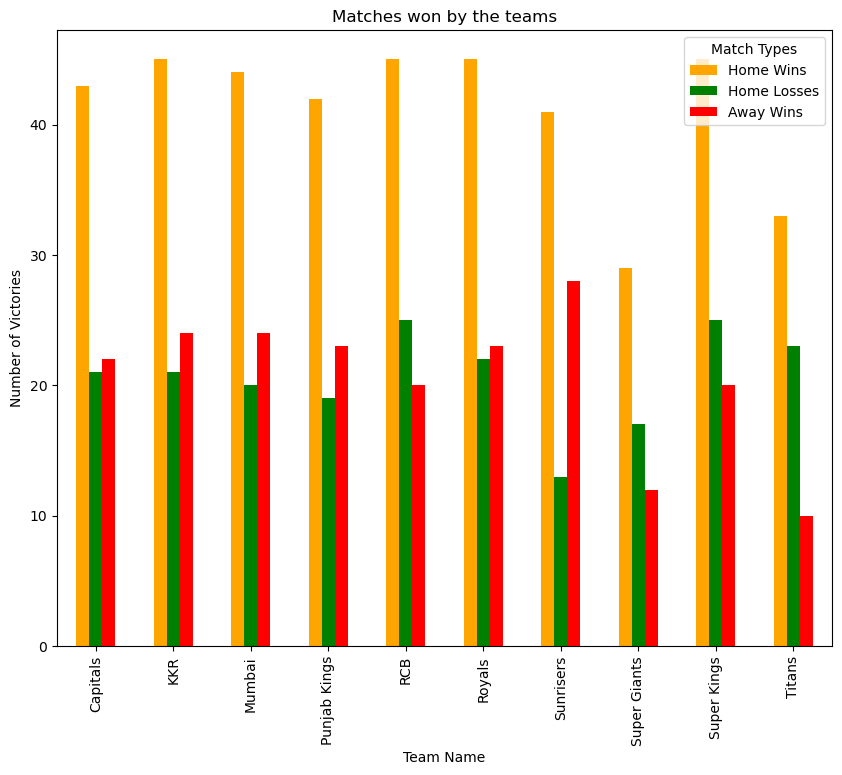

In [43]:
Teams_wins_loss[['TotalMatchces','TotalWins','TotalLoss']].plot(kind = 'bar', color = ['orange','green','red'], title = 'Matches won by the teams', figsize = (10,8))
plt.xlabel('Team Name')
plt.legend(labels=['Home Wins', 'Home Losses', 'Away Wins'], title='Match Types')
plt.ylabel('Number of Victories')
plt.show()

In [182]:
df_all_season_lessthan_60['Total Runs'] = (df_all_season_lessthan_60['runs_x'] + df_all_season_lessthan_60['runs'] + df_all_season_lessthan_60['runs_y'])
df_all_season_lessthan_60.head(5)

,runs_x,balls_x,out/not_out_x,4s_x,6s_x,runs_y,balls_y,out/not_out_y,4s_y,6s_y,runs,balls,out/not_out,4s,6s,batting_average,batting_strike_rate,boundary_percentage,Total Runs
batsmanName,,,,,,,,,,,,,,,,,,,
AbhishekSharma,93,69,5,7,4,426,320,14,47,13,226,157,11,28,6,24.833333,136.446886,62.550336,745
AidenMarkram,146,119,5,12,4,381,274,8,25,19,248,197,11,18,8,32.291667,131.355932,52.387097,775
AmbatiRayudu,257,170,10,16,17,274,224,11,25,15,158,113,10,10,9,22.225806,135.897436,65.312046,689
AndreRussell,183,120,7,14,14,335,192,9,18,32,227,156,11,13,18,27.592593,159.188034,75.704698,745
DavidMiller,124,113,5,11,3,481,337,7,32,23,259,178,8,18,13,43.200000,137.579618,55.324074,864


In [188]:
df_all_season_lessthan_60_bowl['Total Wickets'] = df_all_season_lessthan_60_bowl['wickets_x'] + df_all_season_lessthan_60_bowl['wickets_y'] + df_all_season_lessthan_60_bowl['wickets']
df_all_season_lessthan_60_bowl.head()

,runs_x,wickets_x,overs_x,0s_x,runs_y,wickets_y,overs_y,0s_y,runs,wickets,overs,0s,bowling_average,economy_rate,dot_ball_%,Total Wickets
bowlerName,,,,,,,,,,,,,,,,
AndreRussell,188,11,19.0,39,278,17,27.7,58,172,7,15.1,32,18.228571,10.323625,34.789644,35
AnrichNortje,187,12,30.2,84,217,9,22.2,49,364,10,40.0,96,24.774194,8.311688,41.305916,31
ArshdeepSingh,342,18,40.8,88,385,10,50.0,110,493,17,50.5,114,27.111111,8.634112,36.801132,45
AveshKhan,416,21,57.0,147,416,18,47.4,126,283,8,29.0,61,23.723404,8.358321,41.729135,47
AxarPatel,280,13,42.0,88,321,6,43.0,86,338,11,47.0,105,31.300000,7.113636,35.227273,30


In [66]:
best_batsman_names=[]
best_bowlers_names=[]
def getting_player_names(list_of_players,lst):
    for i in list_of_players:
        lst.append(i)
getting_player_names(top_10_batsmen_total_scored.index,best_batsman_names)
getting_player_names(df_all_season_lessthan_60['batting_average'].round(2).nlargest(10).index,best_batsman_names)
getting_player_names(df_all_season_lessthan_60['batting_strike_rate'].round(1).nlargest(10).index, best_batsman_names)
getting_player_names(df_all_season_lessthan_60['boundary_percentage'].round(2).nlargest(5).index,best_batsman_names)
best_batsman_names = list(set(best_batsman_names))
print(best_batsman_names)
getting_player_names(fact_bowling_summary.groupby("bowlerName")['wickets'].sum().nlargest(10).index,best_bowlers_names)
getting_player_names(df_all_season_lessthan_60_bowl['bowling_average'].round(1).nsmallest(10).index,best_bowlers_names)
getting_player_names(df_all_season_lessthan_60_bowl['economy_rate'].round(2).nsmallest(10).index,best_bowlers_names)
getting_player_names(df_all_season_lessthan_60_bowl['dot_ball_%'].round(2).nlargest(7).index,best_bowlers_names)
getting_player_names(df_all_season_lessthan_60_bowl_maiden['Total_maiden'].round(2).nlargest(4).index,best_bowlers_names)
best_bowlers_names = list(set(best_bowlers_names))
best_players = best_batsman_names + best_bowlers_names
best_players = pd.DataFrame({'name':best_players})
print(best_bowlers_names)
print(best_players)
print(len(best_players))


['ShivamDube', 'DineshKarthik', 'RuturajGaikwad', 'NicholasPooran', 'FafduPlessis', 'ShikharDhawan', 'YashasviJaiswal', 'ShimronHetmyer', 'PrithviShaw', 'ShubmanGill', 'SuryakumarYadav', 'GlennMaxwell', 'KLRahul', 'ViratKohli', 'SanjuSamson', 'AndreRussell', 'JosButtler', 'DavidMiller', 'DavidWarner']
['YuzvendraChahal', 'SunilNarine', 'TrentBoult', 'MohammedSiraj', 'KrunalPandya', 'AnrichNortje', 'HarshalPatel', 'UmranMalik', 'ShardulThakur', 'RavindraJadeja', 'VarunChakravarthy', 'HarpreetBrar', 'AveshKhan', 'RashidKhan', 'MoeenAli', 'BhuvneshwarKumar', 'AndreRussell', 'ArshdeepSingh', 'KhaleelAhmed', 'AxarPatel', 'MohammedShami', 'RavichandranAshwin', 'KagisoRabada', 'RahulChahar']
                  name
0           ShivamDube
1        DineshKarthik
2       RuturajGaikwad
3       NicholasPooran
4         FafduPlessis
5        ShikharDhawan
6      YashasviJaiswal
7       ShimronHetmyer
8          PrithviShaw
9          ShubmanGill
10     SuryakumarYadav
11        GlennMaxwell
12     

In [132]:
# Postion of the best player
best_player_details = best_players.merge(dim_players, on = 'name', how = 'inner')[['name','playingRole','battingStyle','bowlingStyle']]
best_player_details.head(45)

,name,playingRole,battingStyle,bowlingStyle
0,ShivamDube,Allrounder,Left hand Bat,Right arm Medium
1,DineshKarthik,Wicketkeeper Batter,Right hand Bat,Right arm Offbreak
2,RuturajGaikwad,Batter,Right hand Bat,Right arm Offbreak
3,NicholasPooran,Wicketkeeper Batter,Left hand Bat,Right arm Offbreak
4,FafduPlessis,Middle order Batter,Right hand Bat,Legbreak
5,ShikharDhawan,Opening Batter,Left hand Bat,Right arm Offbreak
6,YashasviJaiswal,Opening Batter,Left hand Bat,Legbreak
7,ShimronHetmyer,Top order Batter,Left hand Bat,Not Available
8,PrithviShaw,Opening Batter,Right hand Bat,Right arm Offbreak
9,ShubmanGill,Opening Batter,Right hand Bat,Right arm Offbreak


In [172]:
# We have done our primary analysis now we will be predicting the best 11 of the from season 2023

# Openers - no 1 & 2
# Top Order - no 3 & 4 
# Middle Order - no 5, 6 & 7
# Tail Enders - no 8,9,10 & 11

# My focus is to have 3 bowlers and 1 allrounder in tailenders and 2 power hitters and 1 all rounder in Middle Order High scoring Top Order 
# and 1 consistent Openers and dashing opener.


# # print(df_all_season_lessthan_60.loc[best_player_details[best_player_details['playingRole'] == 'Opening Batter']['name'].values][['batting_average','batting_strike_rate','boundary_percentage']].reset_index())

# # print(df_all_season_lessthan_60.loc[best_player_details[best_player_details['playingRole'] == 'Top order Batter']['name'].values][['batting_average','batting_strike_rate','boundary_percentage']].reset_index())

# # print(df_all_season_lessthan_60.loc[best_player_details[best_player_details['playingRole'] == 'Middle order Batter']['name'].values][['batting_average','batting_strike_rate','boundary_percentage']].reset_index())
# 
# # print(df_all_season_lessthan_60.loc[best_player_details[best_player_details['playingRole'] == 'Wicketkeeper Batter']['name'].values][['batting_average','batting_strike_rate','boundary_percentage']].reset_index())
allrounder_names = best_player_details[best_player_details['playingRole'].str.contains('Allrounder')]
allrounder_names
# # print(df_all_season_lessthan_60.loc[best_player_details[best_player_details['playingRole'].str.contains('Allrounder')]['name'].values][['batting_average','batting_strike_rate','boundary_percentage']].reset_index())


,name,playingRole,battingStyle,bowlingStyle
0,ShivamDube,Allrounder,Left hand Bat,Right arm Medium
11,GlennMaxwell,Batting Allrounder,Right hand Bat,Right arm Offbreak
15,AndreRussell,Allrounder,Right hand Bat,Right arm Fast
16,AndreRussell,Allrounder,Right hand Bat,Right arm Fast
21,SunilNarine,Bowling Allrounder,Left hand Bat,Right arm Offbreak
24,KrunalPandya,Allrounder,Left hand Bat,Slow Left arm Orthodox
29,RavindraJadeja,Allrounder,Left hand Bat,Slow Left arm Orthodox
33,RashidKhan,Bowling Allrounder,Right hand Bat,Legbreak Googly
34,MoeenAli,Batting Allrounder,Left hand Bat,Right arm Offbreak
38,AxarPatel,Bowling Allrounder,Left hand Bat,Slow Left arm Orthodox


In [222]:
# Openers
opening_batsman_names = best_player_details[best_player_details['playingRole'] == 'Opening Batter']
(df_all_season_lessthan_60.reset_index().rename(columns ={'batsmanName':'name'}).merge(opening_batsman_names, on = 'name', how = 'right')[['name','playingRole','batting_average','batting_strike_rate', 'Total Runs','boundary_percentage','battingStyle']]).head()
# My pick is ShubmanGill and YashaviJaiswal because they form a good left-right pair with a good combination of batting average batting strike rate and boundary percentage
# So we have an attacking and run-scoring opening combo

,name,playingRole,batting_average,batting_strike_rate,Total Runs,boundary_percentage,battingStyle
0,ShikharDhawan,Opening Batter,39.771429,128.769658,1392,62.068966,Left hand Bat
1,YashasviJaiswal,Opening Batter,34.303030,152.150538,1132,74.558304,Left hand Bat
2,PrithviShaw,Opening Batter,25.468750,153.195489,815,70.674847,Right hand Bat
3,ShubmanGill,Opening Batter,40.239130,139.068370,1851,58.346840,Right hand Bat
4,DavidWarner,Opening Batter,37.900000,133.450704,1137,64.204046,Left hand Bat


In [224]:
# Top Order Batsman
top_order_batsman_names = best_player_details[best_player_details['playingRole'] == 'Top order Batter']
(df_all_season_lessthan_60.reset_index().rename(columns ={'batsmanName':'name'}).merge(top_order_batsman_names, on = 'name', how = 'right')[['name','playingRole','batting_average','batting_strike_rate','boundary_percentage','Total Runs','battingStyle']]).head()
# My pick is Virat Kholi even though the statistics is contrast he is a big game player and much more consistent in knockout and high-pressure games 

,name,playingRole,batting_average,batting_strike_rate,boundary_percentage,Total Runs,battingStyle
0,ShimronHetmyer,Top order Batter,40.666667,157.274401,63.700234,854,Left hand Bat
1,ViratKohli,Top order Batter,33.780488,127.064220,54.729242,1385,Right hand Bat


In [226]:
# Middle Order Batsman

middle_order_batsman_names =  best_player_details[best_player_details['playingRole'] == 'Middle order Batter']
(df_all_season_lessthan_60.reset_index().rename(columns ={'batsmanName':'name'}).merge(middle_order_batsman_names, on = 'name', how = 'right')[['name','playingRole','batting_average','batting_strike_rate','boundary_percentage','Total Runs','battingStyle']]).head()
# My pick here is FafduPlessis as both virat and Faf have good chemistry

,name,playingRole,batting_average,batting_strike_rate,boundary_percentage,Total Runs,battingStyle
0,FafduPlessis,Middle order Batter,43.595238,140.846154,60.513381,1831,Right hand Bat
1,DavidMiller,Middle order Batter,43.200000,137.579618,55.324074,864,Left hand Bat


In [228]:
# Wicketkeeper Batsman
wicketkeeper_batsman_names = best_player_details[best_player_details['playingRole'] == 'Wicketkeeper Batter']
(df_all_season_lessthan_60.reset_index().rename(columns ={'batsmanName':'name'}).merge(wicketkeeper_batsman_names, on = 'name', how = 'right')[['name','playingRole','batting_average','batting_strike_rate','boundary_percentage','Total Runs','battingStyle']]).head(10)
# My pick is Jos Buttler he can be a finisher and an opener which accounts for his strike rate, boundary percentage, and batting average respectively.

,name,playingRole,batting_average,batting_strike_rate,boundary_percentage,Total Runs,battingStyle
0,DineshKarthik,Wicketkeeper Batter,24.750000,152.643172,65.223665,693,Right hand Bat
1,NicholasPooran,Wicketkeeper Batter,24.300000,157.112069,67.489712,729,Left hand Bat
2,KLRahul,Wicketkeeper Batter,50.533333,132.055749,57.255937,1516,Right hand Bat
3,SanjuSamson,Wicketkeeper Batter,32.600000,144.567627,65.490798,1304,Right hand Bat
4,JosButtler,Wicketkeeper Batter,41.916667,146.932814,68.919814,1509,Right hand Bat


In [216]:
# Batting Allrounder

allrounder_names = best_player_details[best_player_details['playingRole'].str.contains('Allrounder')]
df_all_season_lessthan_60.reset_index().rename(columns ={'batsmanName':'name'}).merge(allrounder_names, on = 'name', how = 'right')[['name','playingRole','batting_average','batting_strike_rate','boundary_percentage', 'Total Runs','battingStyle']].head(10)

,name,playingRole,batting_average,batting_strike_rate,boundary_percentage,Total Runs,battingStyle
0,ShivamDube,Allrounder,32.310345,145.950156,61.259338,937.0,Left hand Bat
1,GlennMaxwell,Batting Allrounder,34.685714,161.436170,68.698517,1214.0,Right hand Bat
2,AndreRussell,Allrounder,27.592593,159.188034,75.704698,745.0,Right hand Bat
3,AndreRussell,Allrounder,27.592593,159.188034,75.704698,745.0,Right hand Bat
4,SunilNarine,Bowling Allrounder,NaN,NaN,NaN,NaN,Left hand Bat
5,KrunalPandya,Allrounder,17.724138,118.981481,50.583658,514.0,Left hand Bat
6,RavindraJadeja,Allrounder,31.352941,137.726098,52.908068,533.0,Left hand Bat
7,RashidKhan,Bowling Allrounder,NaN,NaN,NaN,NaN,Right hand Bat
8,MoeenAli,Batting Allrounder,23.387097,137.310606,66.758621,725.0,Left hand Bat
9,AxarPatel,Bowling Allrounder,NaN,NaN,NaN,NaN,Left hand Bat


In [218]:
# Bowling Allrounder
allrounder_names = best_player_details[best_player_details['playingRole'].str.contains('Allrounder')]
df_all_season_lessthan_60_bowl.reset_index().rename(columns ={'bowlerName':'name'}).merge(allrounder_names, on = 'name', how = 'right')[['name','playingRole','bowling_average','economy_rate','Total Wickets','dot_ball_%','bowlingStyle']].head(20)

,name,playingRole,bowling_average,economy_rate,Total Wickets,dot_ball_%,bowlingStyle
0,ShivamDube,Allrounder,NaN,NaN,NaN,NaN,Right arm Medium
1,GlennMaxwell,Batting Allrounder,NaN,NaN,NaN,NaN,Right arm Offbreak
2,AndreRussell,Allrounder,18.228571,10.323625,35.0,34.789644,Right arm Fast
3,AndreRussell,Allrounder,18.228571,10.323625,35.0,34.789644,Right arm Fast
4,SunilNarine,Bowling Allrounder,29.333333,6.600000,36.0,37.500000,Right arm Offbreak
5,KrunalPandya,Allrounder,35.125000,7.453581,24.0,34.777483,Slow Left arm Orthodox
6,RavindraJadeja,Allrounder,27.405405,7.455882,37.0,32.843137,Slow Left arm Orthodox
7,RashidKhan,Bowling Allrounder,20.904762,7.216438,63.0,35.068493,Legbreak Googly
8,MoeenAli,Batting Allrounder,23.857143,7.086280,21.0,35.832155,Right arm Offbreak
9,AxarPatel,Bowling Allrounder,31.300000,7.113636,30.0,35.227273,Slow Left arm Orthodox


In [238]:
# The All Rounders that we pick are Glen Maxwell and Andre Russel

In [232]:
# Bowler Name
bowler_names = best_player_details[best_player_details['playingRole'] == 'Bowler']
df_all_season_lessthan_60_bowl.reset_index().rename(columns ={'bowlerName':'name'}).merge(bowler_names, on = 'name', how = 'right')[['name','playingRole','bowling_average','economy_rate','Total Wickets','dot_ball_%','bowlingStyle']].head(20)

,name,playingRole,bowling_average,economy_rate,Total Wickets,dot_ball_%,bowlingStyle
0,YuzvendraChahal,Bowler,20.196970,7.682997,66,34.678194,Legbreak Googly
1,TrentBoult,Bowler,28.809524,8.023873,42,46.529620,Left arm Fast medium
2,MohammedSiraj,Bowler,31.846154,8.117647,39,47.712418,Right arm Fast
3,AnrichNortje,Bowler,24.774194,8.311688,31,41.305916,Right arm Fast
4,HarshalPatel,Bowler,20.353846,8.497110,65,36.287733,Right arm Medium
5,UmranMalik,Bowler,26.103448,9.334155,29,44.184135,Right arm Fast
6,ShardulThakur,Bowler,28.372093,9.538702,43,36.486839,Right arm Medium
7,VarunChakravarthy,Bowler,27.477273,7.584693,44,37.745713,Legbreak Googly
8,HarpreetBrar,Bowler,27.944444,7.609682,18,38.325769,Slow Left arm Orthodox
9,AveshKhan,Bowler,23.723404,8.358321,47,41.729135,Right arm Fast medium


In [236]:
# The Four Bowlers are YuzvendraChahal, MohammedShami, ArshdeepSingh, HarshalPatel 